In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile('creditcard.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Información básica del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nResumen estadístico de las columnas numéricas:\n{df.describe()}")

# Distribución de clases
class_dist = df['Class'].value_counts()
print(f"\nDistribución de clases:\n{class_dist}")
print(f"\nPorcentaje de fraudes: {class_dist[1]/class_dist.sum()*100:.4f}%")

# Verificar valores nulos
print(f"\nValores nulos por columna:\n{df.isnull().sum()}")

Dimensiones del dataset: (284807, 31)

Resumen estadístico de las columnas numéricas:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -

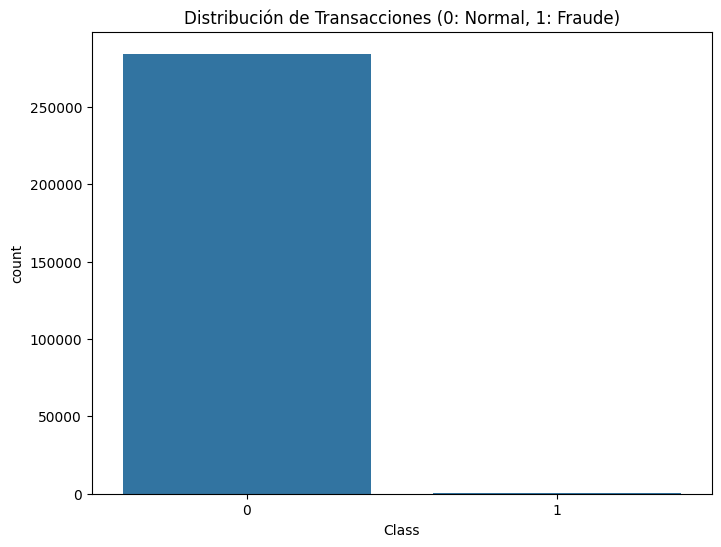

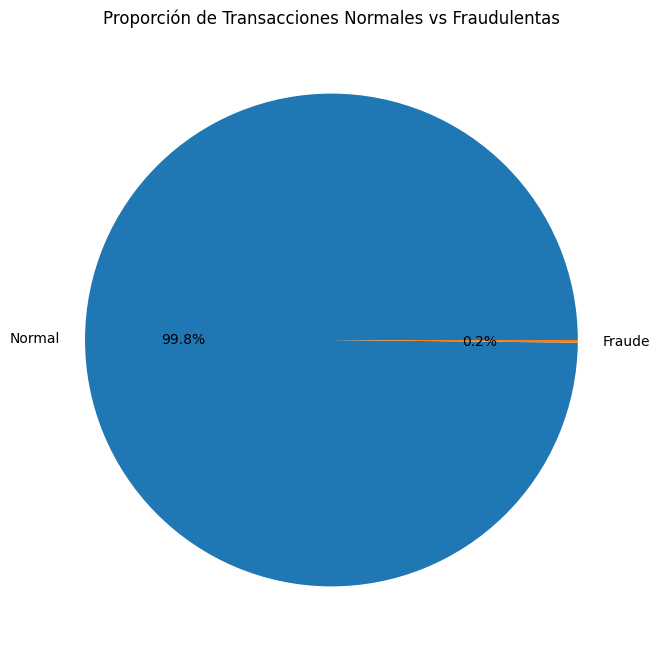

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribución de Transacciones (0: Normal, 1: Fraude)')
plt.show()

# Gráfico de pastel para mostrar el desbalanceo
plt.figure(figsize=(8, 8))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Normal', 'Fraude'])
plt.title('Proporción de Transacciones Normales vs Fraudulentas')
plt.ylabel('')
plt.show()

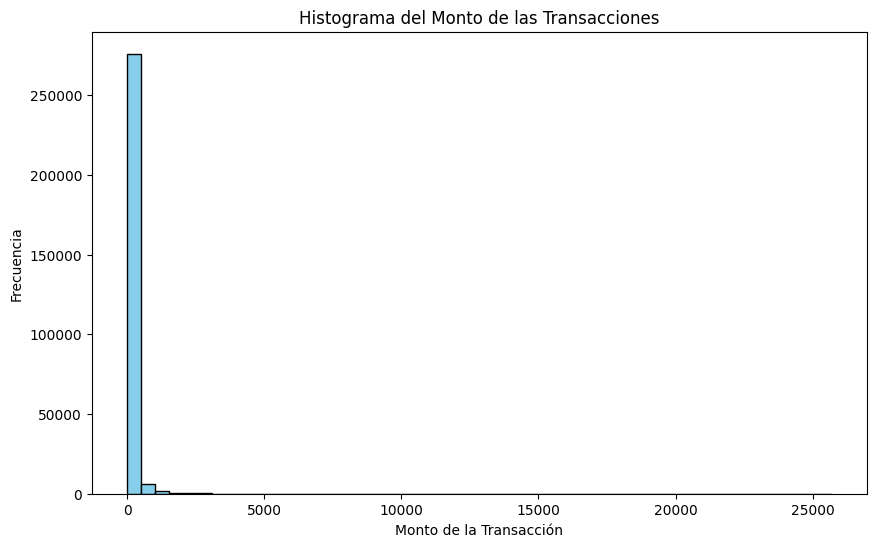

In [ ]:
# Histograma de la variable 'Amount'
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.title('Histograma del Monto de las Transacciones')
plt.show()


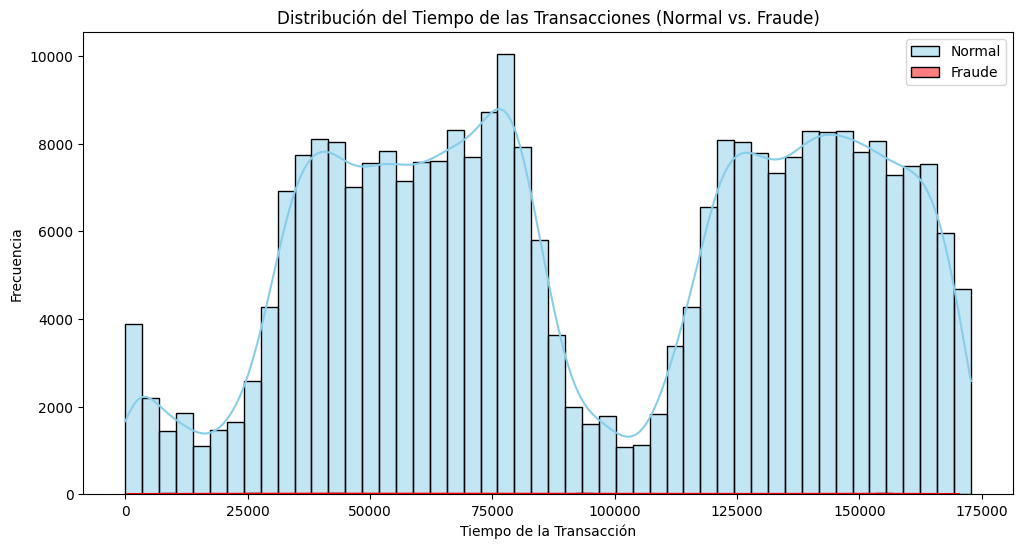

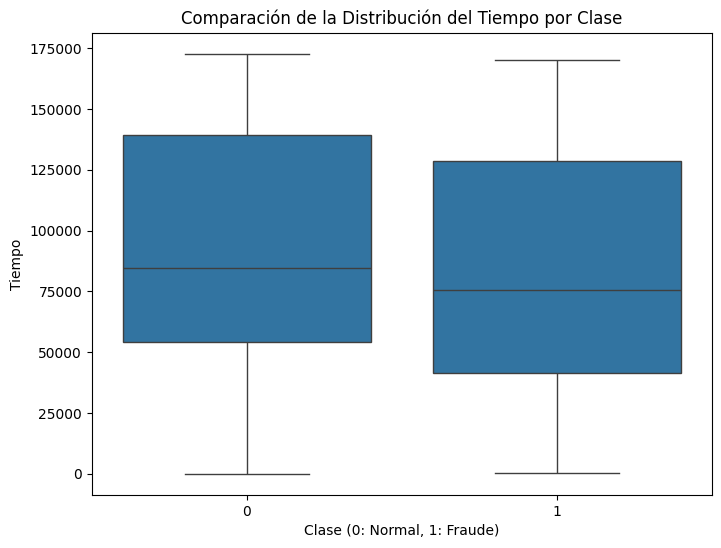

In [ ]:
# Distribución del tiempo de las transacciones para transacciones normales y fraudulentas
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='skyblue', label='Normal', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', label='Fraude', kde=True)
plt.xlabel('Tiempo de la Transacción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo de las Transacciones (Normal vs. Fraude)')
plt.legend()
plt.show()


# Boxplot para comparar la distribución del tiempo en ambas clases
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Comparación de la Distribución del Tiempo por Clase')
plt.xlabel('Clase (0: Normal, 1: Fraude)')
plt.ylabel('Tiempo')
plt.show()


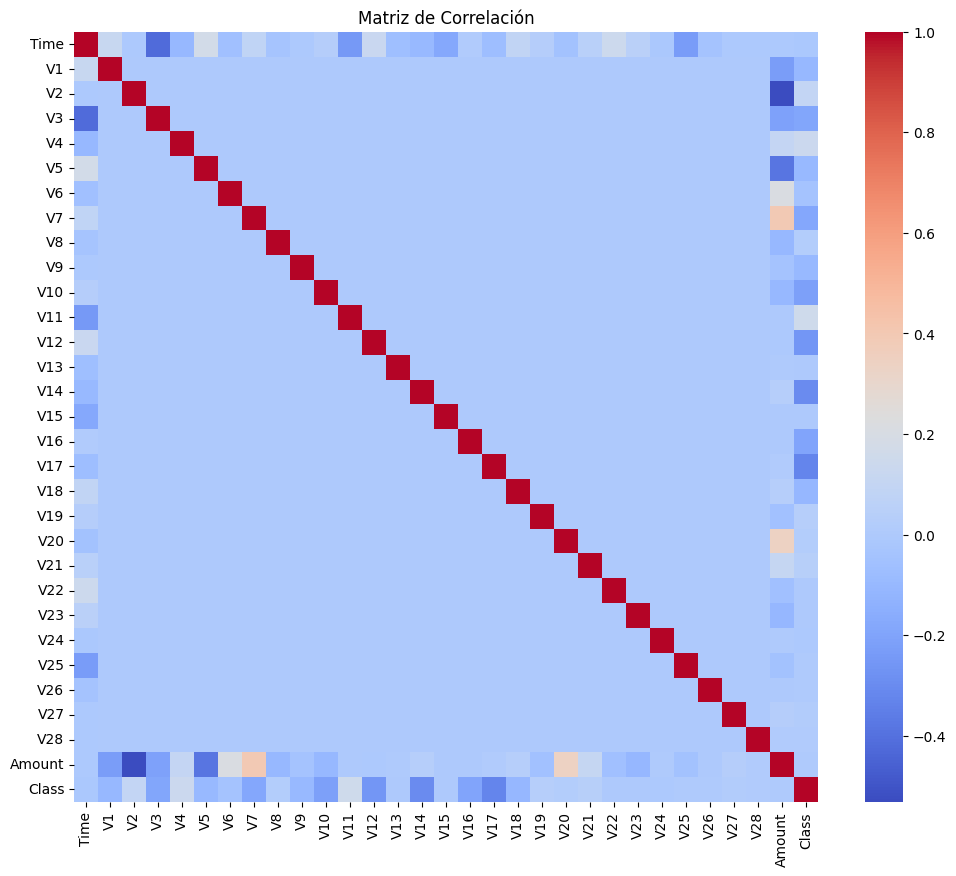

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


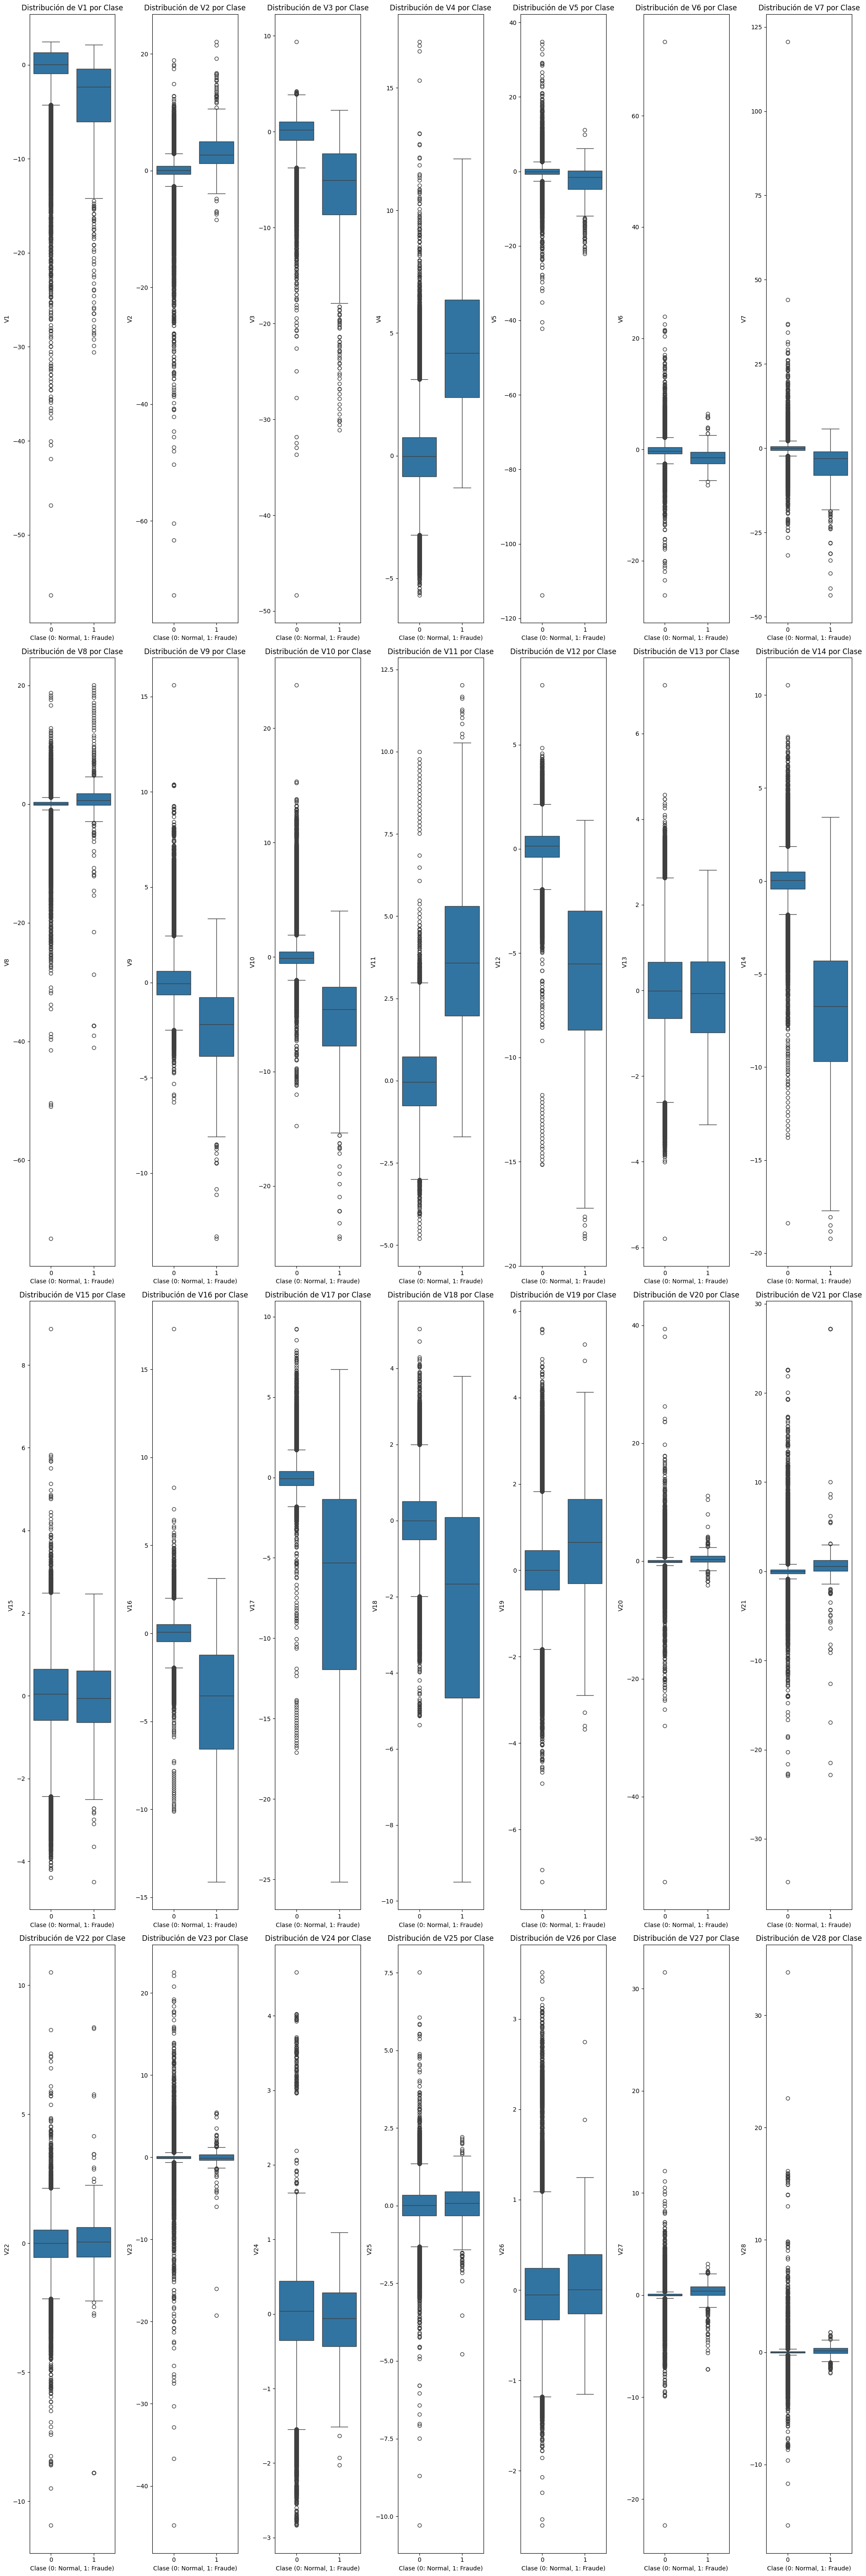

In [ ]:
# Lista de variables 'V'
v_variables = [col for col in df.columns if col.startswith('V')]

# Crear una figura y ejes para los subplots
plt.figure(figsize=(20, 60))  # Ajusta el tamaño de la figura según sea necesario

# Iterar sobre las variables 'V' y crear un boxplot para cada una
for i, variable in enumerate(v_variables):
    plt.subplot(4, 7, i + 1)  # Crea un subplot en una cuadrícula de 10x3
    sns.boxplot(x='Class', y=variable, data=df)
    plt.title(f'Distribución de {variable} por Clase')
    plt.xlabel('Clase (0: Normal, 1: Fraude)')
    plt.ylabel(variable)

# Ajustar el diseño de la figura y mostrar el gráfico
plt.tight_layout()
plt.show()
